In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv('/Users/DericoDehnielsen/Downloads/2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
data.rename(columns = {'Country or region': 'country', 'Overall rank': 'rank', 'Score': 'score', 'GDP per capita': 'gdp per capita', 'Social support': 'social support', 'Healthy life expectancy': 'health', 'Freedom to make life choices': 'freedom', 'Generosity': 'generosity', 'Perceptions of corruption': 'corruption'}, inplace=True)

In [4]:
data.set_index(pd.Series(range(1,157)), inplace=True)

check the distribution of happiness score

Text(0.5, 1.0, 'distribution of happiness score')

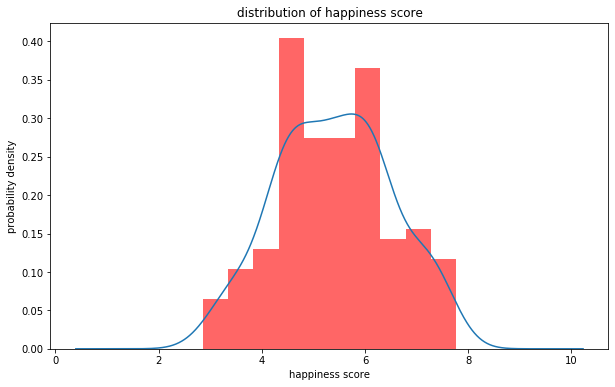

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data['score'].plot(kind='hist',
                  color='r',
                  alpha=0.6,
                  bins=10,
                  figsize=(10,6),
                  density=True,
                  ax=ax)
data['score'].plot.density(ax=ax)

plt.xlabel('happiness score')
plt.ylabel('probability density')
plt.title('distribution of happiness score')

In [6]:
data.isnull().sum()

rank              0
country           0
score             0
gdp per capita    0
social support    0
health            0
freedom           0
generosity        0
corruption        0
dtype: int64

In [7]:
data.describe()

,rank,score,gdp per capita,social support,health,freedom,generosity,corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


visualize happiness score using plotly

In [8]:
data_copy = data.copy()

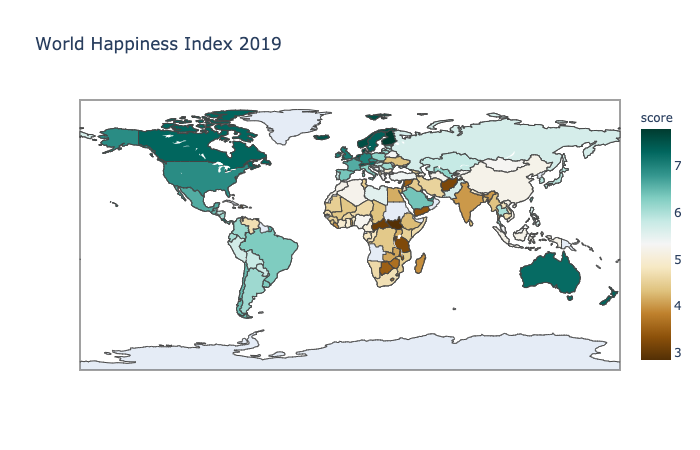

In [26]:
import plotly.express as px

px.choropleth(data_copy, locations = 'country', 
              locationmode='country names', 
              hover_data = ['score'],
              hover_name = 'country',
              projection = 'equirectangular',
              color = 'score',
              color_continuous_scale = 'brbg',
              title = 'World Happiness Index 2019'
              )

# the figure is not showing in github, so here's a png instead

from PIL import Image

jj = Image.open('/Users/DericoDehnielsen/Downloads/mapp.png')
jj

takeaways:

1. happiness score of people living in north america, and australia are relatively higher than other countries
2. happiness score of people living in africa are relatively lower than other countries, while people living in asia are mostly within the score range of 4.5 to 6

comparing the happiest 25 and the least happy 25 countries

In [11]:
by_rank = data.sort_values(by='rank', ascending=True)
top_25 = by_rank.head(25)
bottom_25 = by_rank.tail(25)
combined = pd.concat([top_25, bottom_25])

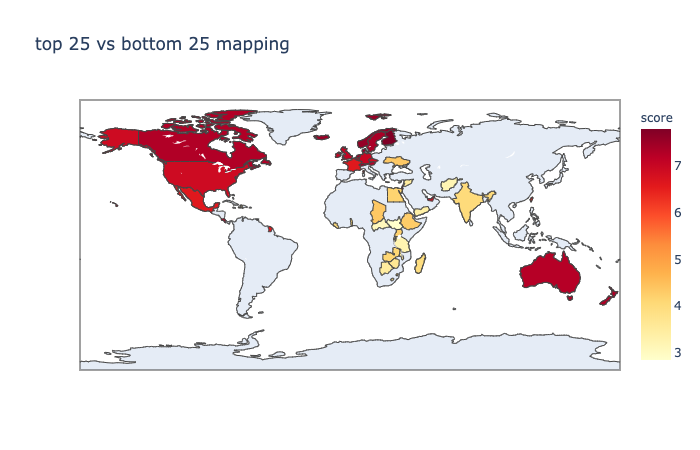

In [27]:
px.choropleth(combined, locations = 'country', 
              locationmode='country names', 
              hover_data = ['score'],
              hover_name = 'country',
              projection = 'equirectangular',
              color = 'score',
              color_continuous_scale = 'ylorrd',
              title = 'top 25 vs bottom 25 mapping'
              )

# the figure is not showing in github, so here's a png instead (2)

ff = Image.open('/Users/DericoDehnielsen/Downloads/mapp2.png')
ff

countries with red fill are the top 25 countries with the highest happiness score while countries with yellow fill are the bottom 25

Text(0, 0.5, 'variable score')

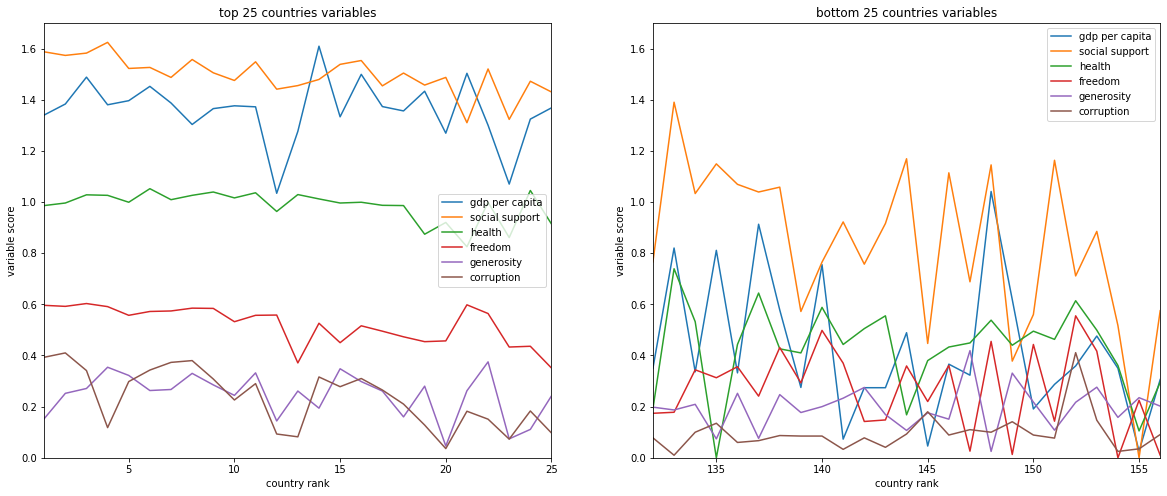

In [14]:
fig = plt.figure(figsize=(20,8))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

top_25.drop(['score', 'rank'], axis=1).plot(kind='line', ax=ax0,
                                           xlim=(1,25), ylim=(0,1.7))
ax0.set_title('top 25 countries variables')
ax0.set_xlabel('country rank')
ax0.set_ylabel('variable score')

bottom_25.drop(['score', 'rank'], axis=1).plot(kind='line', ax=ax1,
                                           xlim=(132,156), ylim=(0,1.7))
ax1.set_title('bottom 25 countries variables')
ax1.set_xlabel('country rank')
ax1.set_ylabel('variable score')

takeaways:
    
1. top 25 countries with the highest happiness score have low fluctuations in all variables regardless the country, while the bottom 25 countries fluctuates a lot depending on the country.
2. the variables for the top 25 countries with the highest happiness score are easier to be generalized with lower error compared to the bottom 25 countries due to the high fluctuations in variable scores.
3. the 3 variables from both groups of countries with the biggest difference are gdp per capita, social support, and health.

let's look at the qualitative analysis of these variables

In [15]:
aa = top_25['gdp per capita'].describe()
bb = bottom_25['gdp per capita'].describe()

aa_bb = pd.DataFrame({'top 25 gdp per capita': aa, 'bottom 25 gdp per capita': bb, 'ration difference': aa/bb})
aa_bb

,top 25 gdp per capita,bottom 25 gdp per capita,ration difference
count,25.000000,25.000000,1.000000
mean,1.359560,0.426800,3.185473
std,0.120858,0.268332,0.450403
min,1.034000,0.026000,39.769231
25%,1.324000,0.275000,4.814545
50%,1.372000,0.350000,3.920000
75%,1.396000,0.578000,2.415225
max,1.609000,1.041000,1.545629


In [16]:
cc = top_25['social support'].describe()
dd = bottom_25['social support'].describe()

cc_dd = pd.DataFrame({'top 25 social support': cc, 'bottom 25 social support': dd, 'ratio difference': cc/dd})
cc_dd

,top 25 social support,bottom 25 social support,ratio difference
count,25.000000,25.000000,1.000000
mean,1.496360,0.831520,1.799548
std,0.073615,0.317818,0.231628
min,1.310000,0.000000,inf
25%,1.457000,0.575000,2.533913
50%,1.504000,0.885000,1.699435
75%,1.548000,1.069000,1.448082
max,1.624000,1.390000,1.168345


In [17]:
ee = top_25['health'].describe()
ff = bottom_25['health'].describe()

ee_ff = pd.DataFrame({'top 25 health': ee, 'bottom 25 health': ff, 'ratio difference': ee/ff})
ee_ff

,top 25 health,bottom 25 health,ratio difference
count,25.000000,25.00000,1.000000
mean,0.984920,0.42868,2.297565
std,0.060174,0.17029,0.353362
min,0.825000,0.00000,inf
25%,0.986000,0.38000,2.594737
50%,0.999000,0.44300,2.255079
75%,1.026000,0.53200,1.928571
max,1.052000,0.73900,1.423545


conclusion:

1. top 25 countries score about 2 times higher than bottom 25 countries in these 3 variables
2. variable scores top 25 countries are more consistent. hence, low standard deviation

so, what makes people happy in these countries?

Text(0.5, 1, 'bottom 25 countries correlation map')

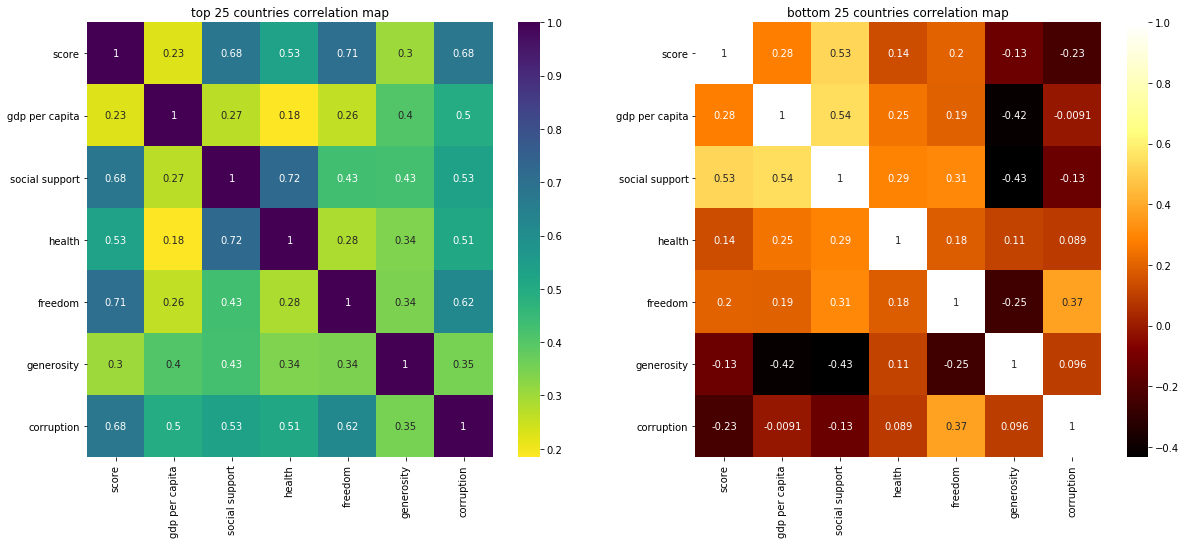

In [18]:
import seaborn as sns

fig = plt.figure(figsize=(20,8))

ax2 = fig.add_subplot(121)
ax3 = fig.add_subplot(122)

top_corr = pd.DataFrame.corr(top_25.drop('rank', axis=1))
sns.heatmap(top_corr, ax=ax2, annot=True, cmap='viridis_r')

ax2.set_title('top 25 countries correlation map')

bottom_corr = pd.DataFrame.corr(bottom_25.drop('rank', axis=1))
sns.heatmap(bottom_corr, ax=ax3, annot=True, cmap='afmhot')
ax3.set_title('bottom 25 countries correlation map')

calculating each variable coefficient using linear regression

In [19]:
from sklearn.linear_model import LinearRegression

top_X = top_25.drop(['rank', 'score', 'country'], axis=1)
top_y = top_25['score']
bottom_X = bottom_25.drop(['rank', 'score', 'country'], axis=1)
bottom_y = bottom_25['score']

linreg_top = LinearRegression()
linreg_bottom = LinearRegression()

linreg_top.fit(top_X, top_y)
linreg_bottom.fit(bottom_X, bottom_y)

print('variables coefficient affecting happiness score in top 25 countries:')
print([column for column in top_X.columns])
print([coef.round(10) for coef in linreg_top.coef_])
print('\n')
print('variables coefficient affecting happiness score in bottom 25 countries:')
print([column for column in bottom_X.columns])
print([coef.round(10) for coef in linreg_bottom.coef_])

variables coefficient affecting happiness score in top 25 countries:
['gdp per capita', 'social support', 'health', 'freedom', 'generosity', 'corruption']
[-0.2822888515, 1.8301673532, 0.1910081968, 1.9295850155, -0.2863516826, 0.8054167271]


variables coefficient affecting happiness score in bottom 25 countries:
['gdp per capita', 'social support', 'health', 'freedom', 'generosity', 'corruption']
[0.1001233181, 0.6818407544, -0.1450374938, 0.4986966604, 1.0010183908, -1.4151043956]


takeaways:

In [20]:
print('top variables according to the correlation map')
pd.DataFrame({'top 25 countries': pd.Series(['freedom','social support', 'corruption perceptions'], index=['first', 'second', 'third']),
             'bottom 25 countries': pd.Series(['social support', 'gdp per capita', 'corruption perceptions'], index=['first', 'second', 'third'])})

top variables according to the correlation map


,top 25 countries,bottom 25 countries
first,freedom,social support
second,social support,gdp per capita
third,corruption perceptions,corruption perceptions


In [21]:
print('top variables according to the multiple linear regression coefficient')
pd.DataFrame({'top 25 countries': pd.Series(['freedom','social support', 'corruption perceptions'], index=['first', 'second', 'third']),
             'bottom 25 countries': pd.Series(['corruption perceptions', 'generosity', 'social support'], index=['first', 'second', 'third'])})

top variables according to the multiple linear regression coefficient


,top 25 countries,bottom 25 countries
first,freedom,corruption perceptions
second,social support,generosity
third,corruption perceptions,social support


analysis:

the reason that the top 3 variables that affect happiness score in top 25 countries are the same in both analysis methods may be because of its consistency in the variable scores. this is the opposite of the variable scores in bottom 25 countries. therefore, the top 3 variables that affect happiness score in the bottom 25 countries are different in both analysis methods. 

conclusion:
    
1. top 3 factors affecting the happiness score in the 25 happiest countries are different from those in the 25 least happy countries
2. although a lot people said that economical factor is one of the most important factors in the happiness report, gdp per capita does not even make it to the top 3 list and in the case of the happiest 25 countries, gdp per capita has the lowest correlation to happiness score. however, gdp per capita is still the second variable that correlates to happiness score in 25 least happy countries according to the correlation map.
3. some geographical areas have higher happiness score than others.
4. this analysis does not take into consideration the specific conditions of each country. therefore, there may be some irregularity in the real world.